### Multi-Class RNN+GRU

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
import seaborn as sns
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, GRU, Dropout,Bidirectional
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv(r'/content/classification_in_asteroseismology.csv')

In [ ]:
df.head()

,POP,Dnu,numax,epsilon
0,1,4.44780,43.06289,0.985
1,0,6.94399,74.07646,0.150
2,1,2.64571,21.57891,0.855
3,1,4.24168,32.13189,0.840
4,0,10.44719,120.37356,0.275


In [ ]:
x = df.drop('POP', axis=1)
y = df.POP
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
vocab_size = 50000

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim = 64,input_length=3))
model.add(Bidirectional(GRU(512,return_sequences=True)))
model.add(SimpleRNN(1026))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
# model.add(Dropout(0.02))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = opt,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3, 64)             3200000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 3, 1024)          1775616   
 nal)                                                            
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 1026)              2104326   
                                                                 
 dense_2 (Dense)             (None, 512)               525824    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                      

In [ ]:
history = model.fit(X_train, Y_train, epochs = 20, verbose=1, validation_split=0.1)

Epoch 1/20
23/23 [==============================] - 10s 214ms/step - loss: 0.4574 - accuracy: 0.7792 - val_loss: 0.2926 - val_accuracy: 0.9375
Epoch 2/20
23/23 [==============================] - 4s 160ms/step - loss: 0.2485 - accuracy: 0.9069 - val_loss: 0.2166 - val_accuracy: 0.9375
Epoch 3/20
23/23 [==============================] - 4s 160ms/step - loss: 0.2497 - accuracy: 0.9125 - val_loss: 0.1508 - val_accuracy: 0.9250
Epoch 4/20
23/23 [==============================] - 4s 172ms/step - loss: 0.1936 - accuracy: 0.9292 - val_loss: 0.1652 - val_accuracy: 0.9375
Epoch 5/20
23/23 [==============================] - 4s 165ms/step - loss: 0.1786 - accuracy: 0.9194 - val_loss: 0.1566 - val_accuracy: 0.9375
Epoch 6/20
23/23 [==============================] - 4s 162ms/step - loss: 0.1993 - accuracy: 0.9208 - val_loss: 0.1744 - val_accuracy: 0.9125
Epoch 7/20
23/23 [==============================] - 4s 162ms/step - loss: 0.2078 - accuracy: 0.9139 - val_loss: 0.1576 - val_accuracy: 0.9375
Epoch

In [ ]:
def plot_graph(history,string):
    
    plt.plot(history.history[string],label='training '+string)
    plt.plot(history.history['val_'+string],label='validation '+string)
    plt.legend()
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.title(string+' vs epochs')
    plt.show()

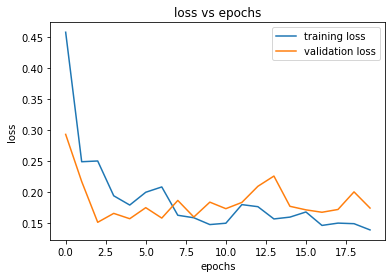

In [ ]:
plot_graph(history,'loss')

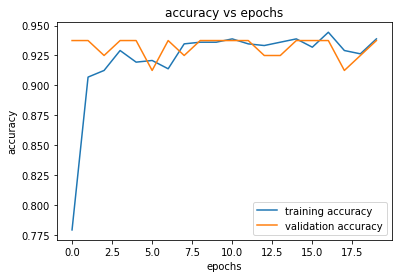

In [ ]:
plot_graph(history,'accuracy')

In [ ]:
round(model.evaluate(X_train, Y_train)[1],2)

25/25 [==============================] - 2s 30ms/step - loss: 0.1391 - accuracy: 0.9450


0.94

In [ ]:
round(model.evaluate(X_test, Y_test)[1],2)

7/7 [==============================] - 0s 28ms/step - loss: 0.3588 - accuracy: 0.9254


0.93

In [ ]:
ypred = model.predict(X_test)

pred = (ypred>0.5).astype('int')

In [ ]:

from sklearn.metrics import classification_report

print(classification_report(Y_test,pred))


              precision    recall  f1-score   support

           0       0.89      0.84      0.86        56
           1       0.94      0.96      0.95       145

    accuracy                           0.93       201
   macro avg       0.91      0.90      0.91       201
weighted avg       0.92      0.93      0.92       201



In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision_score, recall_score, f1_score ,_ = precision_recall_fscore_support(Y_test, pred, average='weighted')

print("Precision:", round(precision_score,2))

print("Recall:", round(recall_score,2))

print("F1:", round(f1_score,2))

Precision: 0.92
Recall: 0.93
F1: 0.92


In [ ]:
from sklearn.metrics import log_loss
print('Log_loss: {}'.format(log_loss(Y_test, pred)))

Log_loss: 2.5775564293558815


In [ ]:
from sklearn.metrics import roc_auc_score
round(roc_auc_score(Y_test, pred),2)

0.9

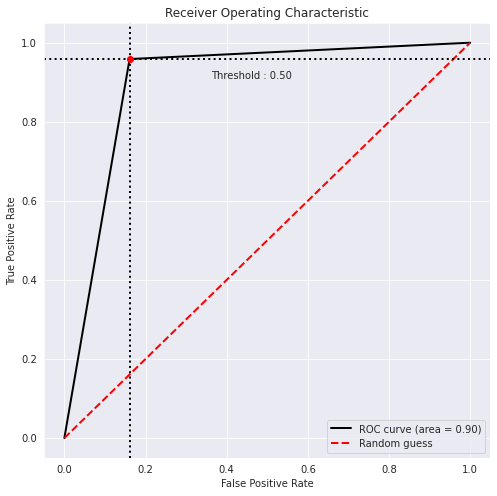

In [ ]:
from plot_metric.functions import BinaryClassification
bc = BinaryClassification(Y_test, pred, labels=["Class 1", "Class 2"])
plt.figure(figsize=(8,8))
bc.plot_roc_curve()
plt.show()